"/home/maxmouchet/Cozy/Kaggle/Santa/kaggle-traveling-santa-2018-prime-paths/scripts_julia/Project.toml"

In [2]:
using BenchmarkTools
using ProgressMeter
using PyPlot
using Random
import DataStructures: CircularBuffer

In [3]:
include("src/Santa.jl")
using .Santa

In [4]:
function swap!(v::Vector{T}, a::Int, b::Int) where T
    v[a], v[b] = v[b], v[a]
end

swap! (generic function with 1 method)

In [5]:
# Base.length(::City) = 1
# Base.iterate(c::City) = (c, nothing)
# Base.iterate(::City, ::Nothing) = nothing

In [6]:
cities = Santa.read_cities("../input/cities.csv");
path = Santa.read_path(cities, "../scripts/genetic_pool/1517028.csv");
Santa.score(path)

1.5170284218582672e6

In [7]:
path = Santa.read_path(cities, "/home/maxmouchet/Downloads/1516917.csv");
Santa.score(path)

1.5169178997302188e6

In [15]:
Santa.to_tsplib("1516917.tsp", path[1:end])

4349533

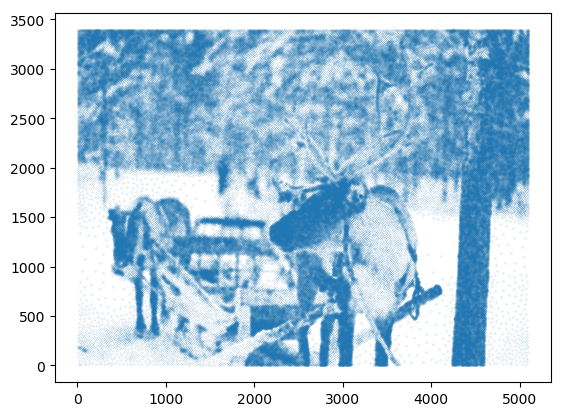

PyObject <matplotlib.collections.PathCollection object at 0x7f18edfd1eb8>

In [26]:
scatter(map(c -> c.x, cities), map(c -> c.y, cities), s=0.01)

In [27]:
path = Santa.random_path(cities)
 Santa.score(path)

4.4694539284196585e8

In [18]:
# Should be exact for the closest city, but may be wrong (why ?) for other cities                                                                              
function find_closest_cities_approx(cities::Vector{City}, city::City, K::Int)                                                                                  
    K = min(K, length(cities))                                                                                                                                 
    buffer = CircularBuffer{Int}(K)                                                                                                                            
    valmin = maxintfloat(Float64)                                                                                                                              
    for (i, c) in enumerate(cities)                                                                                                                            
        city.i == c.i && continue                                                                                                                              
        val = distance(city, c)                                                                                                                                
        if val < valmin                                                                                                                                        
            valmin = val                                                                                                                                       
            push!(buffer, i)                                                                                                                                   
        end                                                                                                                                                    
    end                                                                                                                                                        
    buffer                                                                                                                                                     
end                                                                                                                                                            
                                                                                                                                                               
function solve_greedy(cities::Vector{City})                                                                                                                    
    @assert cities[1].i == 0                                                                                                                                   
    path = [cities[1]]                                                                                                                                         
    to_place = cities[2:end] # This is a copy                                                                                                                  
    @showprogress for i = 1:length(cities)-1                                                                                                                   
        idxmin = find_closest_cities_approx(to_place, path[i], 1)[1]                                                                                           
        push!(path, to_place[idxmin])                                                                                                                          
        deleteat!(to_place, idxmin)                                                                                                                            
    end                                                                                                                                                        
    push!(path, cities[1])                                                                                                                                     
    path                                                                                                                                                       
end              

solve_greedy (generic function with 1 method)

In [102]:
path_greedy = solve_greedy(cities)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:43


197770-element Array{City,1}:
 City(0, false, 316.836739061509, 2202.34070733524)     
 City(78934, false, 314.716006798186, 2193.8888357871)  
 City(111804, false, 314.494243312195, 2186.64674767296)
 City(52086, false, 308.608834287432, 2185.79795356423) 
 City(18295, false, 308.903690863706, 2178.86836182647) 
 City(134585, false, 305.515942441998, 2174.91133677109)
 City(109090, false, 305.507481154249, 2169.64027406796)
 City(37150, false, 308.411578634224, 2165.03035255425) 
 City(96442, false, 314.039635760104, 2160.98155101422) 
 City(126815, false, 319.546638178268, 2163.57421058608)
 City(122542, false, 316.15315497475, 2167.66578208334) 
 City(142366, false, 311.923519378368, 2171.76784832097)
 City(25283, false, 317.130946313904, 2173.64124165315) 
 ⋮                                                      
 City(20700, false, 466.656501721845, 87.9326740119409) 
 City(175547, false, 690.441107502875, 82.7085782034601)
 City(82101, false, 697.894937006569, 120.225552919836) 
 

In [17]:
score(path_greedy)

UndefVarError: UndefVarError: path_greedy not defined

In [ ]:
read_path

In [38]:
@assert p_opt[1].i == p_opt[end].i == 0
@assert length(unique(p_opt)) == 197769

In [16]:
p_opt = Santa.from_tsplib("iterated_tour.tsp", cities)
push!(p_opt, cities[1])
# pushfirst!(p_opt, cities[1])
Santa.score(p_opt)

1.5169192584990012e6

In [11]:
path = Santa.read_path(cities, "/home/maxmouchet/Downloads/1516917.csv");
Santa.score(path)

1.5169178997302188e6

In [33]:
p_opt = Santa.from_tsplib("iterated_tour.tsp", cities)
push!(p_opt, cities[1])
Santa.score(p_opt)

1.750642675426554e6

In [135]:
readlines("iterated_tour.tsp")

197772-element Array{String,1}:
 "DIMENSION : 197769"               
 "TOUR_COST : 1734874777"           
 "NODE_COORD_SECTION"               
 "1 316837.00000 2202341.00000"     
 "2 314716.00000 2193889.00000"     
 "3 314494.00000 2186647.00000"     
 "4 308609.00000 2185798.00000"     
 "5 308904.00000 2178868.00000"     
 "6 305516.00000 2174911.00000"     
 "7 305507.00000 2169640.00000"     
 "8 308412.00000 2165030.00000"     
 "9 314040.00000 2160982.00000"     
 "10 319547.00000 2163574.00000"    
 ⋮                                  
 "197758 320129.00000 2220605.00000"
 "197759 308319.00000 2222035.00000"
 "197760 306733.00000 2200737.00000"
 "197761 305186.00000 2192456.00000"
 "197762 297672.00000 2192997.00000"
 "197763 290865.00000 2191070.00000"
 "197764 292275.00000 2181744.00000"
 "197765 298766.00000 2175741.00000"
 "197766 297553.00000 2167855.00000"
 "197767 301840.00000 2162625.00000"
 "197768 290575.00000 2172790.00000"
 "197769 301364.00000 2183866.00000"

In [109]:
to_tslib("cities_greedy.tsp", path_greedy)

5140587

In [130]:
path = Vector{City}()
for line in readlines("iterated_tour.tsp")[4:end]
    i, x, y = split(line)
    push!(path, coords_to_cities["$(round(Int, parse(Float64, x))),$(round(Int, parse(Float64, y)))"])
end
# pushfirst!(path, cities[1])
push!(path, cities[1])
path

197770-element Array{City,1}:
 City(0, false, 316.836739061509, 2202.34070733524)     
 City(78934, false, 314.716006798186, 2193.8888357871)  
 City(111804, false, 314.494243312195, 2186.64674767296)
 City(52086, false, 308.608834287432, 2185.79795356423) 
 City(18295, false, 308.903690863706, 2178.86836182647) 
 City(134585, false, 305.515942441998, 2174.91133677109)
 City(109090, false, 305.507481154249, 2169.64027406796)
 City(37150, false, 308.411578634224, 2165.03035255425) 
 City(96442, false, 314.039635760104, 2160.98155101422) 
 City(126815, false, 319.546638178268, 2163.57421058608)
 City(122542, false, 316.15315497475, 2167.66578208334) 
 City(142366, false, 311.923519378368, 2171.76784832097)
 City(25283, false, 317.130946313904, 2173.64124165315) 
 ⋮                                                      
 City(46360, false, 308.318540794306, 2222.0351640642)  
 City(48816, false, 306.733267251259, 2200.73664529518) 
 City(40230, false, 305.18604794272, 2192.45588855616)  
 

In [131]:
score(path)

1.750642675426554e6

In [114]:
map(line -> split(line), readlines("iterated_tour.tsp")[4:end])

197769-element Array{Array{SubString{String},1},1}:
 ["1", "316837.00000", "2202341.00000"]     
 ["2", "314716.00000", "2193889.00000"]     
 ["3", "314494.00000", "2186647.00000"]     
 ["4", "308609.00000", "2185798.00000"]     
 ["5", "308904.00000", "2178868.00000"]     
 ["6", "305516.00000", "2174911.00000"]     
 ["7", "305507.00000", "2169640.00000"]     
 ["8", "308412.00000", "2165030.00000"]     
 ["9", "314040.00000", "2160982.00000"]     
 ["10", "319547.00000", "2163574.00000"]    
 ["11", "316153.00000", "2167666.00000"]    
 ["12", "311924.00000", "2171768.00000"]    
 ["13", "317131.00000", "2173641.00000"]    
 ⋮                                          
 ["197758", "417578.00000", "2349287.00000"]
 ["197759", "459314.00000", "2333879.00000"]
 ["197760", "471634.00000", "2212879.00000"]
 ["197761", "418502.00000", "2146692.00000"]
 ["197762", "408515.00000", "2141626.00000"]
 ["197763", "399864.00000", "2134894.00000"]
 ["197764", "387453.00000", "2134592.00000"]
 ["

In [81]:
function optimize_2opt_v2(init_path::Vector{City})
    path = copy(init_path)
    best = score(path)
    for i = 2:length(path)-1
        println(i)
        for j = i+2:length(path)-1
            if (distance(path[i], path[i+1]) + distance(path[j], path[j+1])) > (distance(path[i], path[j]) + distance(path[i+1], path[j+1]))
                reverse!(path, i, j)
                s = score(path)
                println(best, " ", s)
                break
            end
        end
    end
end

optimize_2opt_v2 (generic function with 1 method)

In [82]:
optimize_2opt_v2(path_original)

2
1.8126021861388376e6 1.8126336483612503e6
3
1.8126021861388376e6 1.8126353727490057e6
4
1.8126021861388376e6 1.8126491248779667e6
5
1.8126021861388376e6 1.812583756679874e6
6
7
8
1.8126021861388376e6 1.8129230120590986e6
9
1.8126021861388376e6 1.8129234958763605e6
10
1.8126021861388376e6 1.8128892426646813e6
11
1.8126021861388376e6 1.8128596180960769e6
12
13
1.8126021861388376e6 1.8128949480670523e6
14
1.8126021861388376e6 1.812903162609041e6
15
16
17
18
19
1.8126021861388376e6 1.812901560945412e6
20
21
22
23
1.8126021861388376e6 1.81292655014864e6
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
1.8126021861388376e6 1.8129210542006146e6
43
1.8126021861388376e6 1.8130195453538897e6
44
1.8126021861388376e6 1.8129998687442073e6
45
1.8126021861388376e6 1.8130472546255703e6
46
1.8126021861388376e6 1.8130566249647904e6
47
48
49
50
51
52
53
54
1.8126021861388376e6 1.8133439731264308e6
55
1.8126021861388376e6 1.8133616257418366e6
56
57
58
59
1.8126021861388376e6 1.8133567113642294e6

InterruptException: InterruptException:

In [70]:
function optimize_2opt(init_path::Vector{City})
    path = copy(init_path)
    best = score(path)
    for i = 2:length(path)-1
        @showprogress for k = i+1:length(path)-1
            reverse!(path, i, k)
            s = score(path)
            if s < best
                best = s
                println(best)
            else
                reverse!(path, i, k)
            end
        end
    end
end

optimize_2opt (generic function with 1 method)

In [71]:
optimize_2opt(path_original)

Progress:   9%|████                                     |  ETA: 0:01:55

InterruptException: InterruptException:

In [61]:
path = copy(path_original)
best = score(path)
@showprogress for i = 2:length(path)-1001
    global best
    for k = i+1:i+10
        rev
        swap_2opt!(path, i, k)
        s = score(path)
        if s < best
            best = s
            println(s)
            found = true
            break
        else
            swap_2opt!(path, i, k)
        end
    end
end

1.8126012349587858e6
1.8125947787854818e6
1.812592339374275e6
1.8125872102155606e6
1.8125831651019747e6
1.812578091878249e6
1.8125729269228065e6
1.812568273334604e6
1.8125670785560482e6
1.8125656460056144e6
1.8125640817637474e6
1.8125551523583771e6
1.812547940976043e6
1.8125450867514801e6
1.812541787130492e6
1.8125355060334671e6
1.8125353340526214e6
1.8125317552896307e6
1.8125298320563382e6
1.8125222323768674e6
1.8125153550579306e6
1.8125112954622617e6
1.81251102782166e6


Progress:   1%|                                         |  ETA: 0:24:44

1.812509683653783e6
1.8125078838956829e6
1.812507084251791e6
1.8125038757112264e6
1.812498689473136e6
1.8124926783935963e6
1.8124919004295245e6


Progress:   1%|                                         |  ETA: 0:24:38

InterruptException: InterruptException:

In [57]:
path = copy(path_original)
best = score(path)
for z = 1:10000
    println(z)
    found = false
    for i = 2:length(path)-1001
        if found
            found = false
            break
        end
        for k = i+1:i+1000
            swap_2opt!(path, i, k)
            s = score(path)
            if s < best
                best = s
                println(s)
                found = true
                break
            else
                swap_2opt!(path, i, k)
            end
        end
    end
end

1
1.8126012349587858e6
2


InterruptException: InterruptException:

In [53]:
best = score(path)
for z = 1:10000
    println(z)
    i = rand(2:length(path)-1)
    for k = i+1:i+100
        swap_2opt!(path, i, k)
        s = score(path)
        if s < best
            best = s
            println(s)
            break
        else
            swap_2opt!(path, i, k)
        end
    end
end

1
2
3
4
5
1.8125839418430266e6
6
7
8
9
10
1.8125661451116332e6
11
12
13
14
15
16
17
1.8125633848330944e6
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
1.812518665184535e6
34
35
36
37
38
39
1.8125096461314345e6
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
1.81250830916829e6
59
60
61
62
63
64
1.8125074417262939e6
65
66
67
68
1.8125068471426251e6
69
70
71
72
73
74
75
76
77
1.8125030784594822e6
78
79
1.8124987219188637e6
80
81
82
1.8124934158439257e6
83
84
85
1.8124918253073106e6
86
87
88
89
1.812485429519142e6
90
91
92
93
94
95
96
97
98
99
1.8124780294858909e6
100
101
102
1.8124766932063145e6
103
104
105
106
107
108
109
1.8124762322363018e6
110
1.8124723222709545e6
111
112
1.8124709721041832e6
113
114
115
1.8124660765591955e6
116
117
118
119
120
121
122
123
1.812463913078207e6
124
125
126
127
128
129
1.8124623588130707e6
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
1.8124596625804536e6
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163

InterruptException: InterruptException:

In [45]:
function solve_greedy(cities::Vector{City})
    @assert cities[1].i == 0
    path = [cities[1]]
    to_place = cities[2:end] # This is a copy
    @showprogress for i = 1:length(cities)-1
        idxmin = find_closest_cities_approx(to_place, path[i], 1)[1]
        push!(path, to_place[idxmin])
        deleteat!(to_place, idxmin)
    end
    push!(path, cities[1])
    path
end

solve_greedy (generic function with 1 method)

In [46]:
@time path = solve_greedy(cities)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


 74.956007 seconds (2.52 M allocations: 147.392 MiB, 0.05% gc time)


197770-element Array{City,1}:
 City(0, false, 316.836739061509, 2202.34070733524)     
 City(78934, false, 314.716006798186, 2193.8888357871)  
 City(111804, false, 314.494243312195, 2186.64674767296)
 City(52086, false, 308.608834287432, 2185.79795356423) 
 City(18295, false, 308.903690863706, 2178.86836182647) 
 City(134585, false, 305.515942441998, 2174.91133677109)
 City(109090, false, 305.507481154249, 2169.64027406796)
 City(37150, false, 308.411578634224, 2165.03035255425) 
 City(96442, false, 314.039635760104, 2160.98155101422) 
 City(126815, false, 319.546638178268, 2163.57421058608)
 City(122542, false, 316.15315497475, 2167.66578208334) 
 City(142366, false, 311.923519378368, 2171.76784832097)
 City(25283, false, 317.130946313904, 2173.64124165315) 
 ⋮                                                      
 City(20700, false, 466.656501721845, 87.9326740119409) 
 City(175547, false, 690.441107502875, 82.7085782034601)
 City(82101, false, 697.894937006569, 120.225552919836) 
 

In [49]:
score(path)

1.8126021861388376e6

In [66]:
function hill_climbing(init_path::Vector{City}, iterations::Int)
    best = score(init_path)
    path = copy(init_path)
    r = 2:length(init_path)-1

    t, speed = time(), 0

    for i = 1:iterations
        #if i % 100 == 0
        #   speed = round(100 / (time() - t))
        #    print("\33[2K [$(speed) iterations/s] $(i)/$(iterations) score = $(best)\r")
        #    t = time()
        #end

        a, b = rand(r, 2)
        swap!(path, a, b)
        _score = score(path)
        if _score < best
            best = _score
            println(best)
        else
            swap!(path, a, b)
        end
    end
    path
end

hill_climbing (generic function with 1 method)

In [70]:
score(hill_climbing(path, 10000))

1.8126021861388376e6